In [88]:
import math
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import os
import re
import spacy
from spacy.tokens import Token
from helper import *
import ast

#extracting dataframe paths
parent_folder = os.path.dirname(os.path.dirname(os.path.abspath("alt2.ipynb")))
char_data_path= os.path.join(parent_folder, "Data\\character.metadata.tsv")
plot_data_path= os.path.join(parent_folder, "Data\\resolved_texts_fastcoref.csv")
data_path= os.path.join(parent_folder, "Data\\Verb_Subject_Object.csv")
characters_list_path= os.path.join(parent_folder, "Data\\characters_list.csv")
interaction_path= os.path.join(parent_folder, "Data\\charA_action_charB.csv")
graph_path= os.path.join(parent_folder, "Data\\graph_df.csv")

#building character matadata dataframe
ind={0:"Wikipedia movie ID", 1:"Freebase movie ID", 2:"Movie release date", 3:"Character name", 4:"Actor date of birth", 5:"Actor gender", 6:"Actor height", 7:"Actor ethnicity", 8:"Actor name", 9:"Actor age at movie release", 10:"Freebase character/actor map ID", 11:"Freebase character ID", 12:"Freebase actor ID"}
characters_df= pd.read_csv(char_data_path, delimiter="\t", header=None)
characters_df=characters_df.rename(columns=ind)

#building plot summaries dataframe
'''
plots_df = pd.read_csv(plot_data_path, delimiter=',')
plots_df = plots_df.rename(columns={"wiki_id":"Wikipedia movie ID", "resolved_text":"Plot Summary"})
plots_df=plots_df.set_index("Wikipedia movie ID")
char_df = pd.read_csv(characters_list_path, delimiter=',')
char_df['characters'] = char_df['characters'].apply(ast.literal_eval)
char_df.set_index("Wikipedia movie ID", inplace=True)
df = pd.read_csv(data_path, delimiter=',')
df['Subject'] = df['Subject'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else np.nan)
df['Object'] = df['Object'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else np.nan)
df = df.merge(char_df, how='left', on='Wikipedia movie ID')
interaction_df = pd.read_csv(interaction_path, delimiter=',')
interaction_df['char A'] = interaction_df['char A'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else np.nan)
interaction_df['char B'] = interaction_df['char B'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else np.nan)
interaction_df['action'] = interaction_df['action'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else np.nan)
'''
graph_df = pd.read_csv(graph_path, delimiter=',')
graph_df['action'] = graph_df['action'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else np.nan)
graph_df['combined_action'] = graph_df['action'].apply(lambda x: ' '.join(x))

c:\Users\mehdi\anaconda3\envs\roll\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


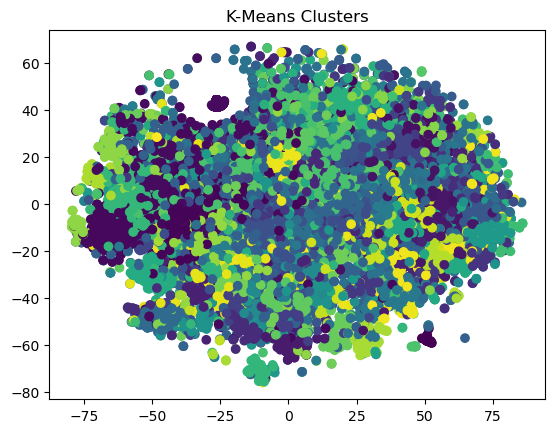

Cluster 0: ['fifty', 'eleven', 'thirty', 'thousand', 'few', 'thirteen', 'four', 'fifteen', 'seventeen', 'twelve', 'three', 'hundred', 'five', 'seven', 'ten', 'fourteen', 'couple', 'dozen', 'nine', 'sixteen', 'six', 'two', 'eight', 'eighteen', 'twenty', 'nineteen', 'forty', 'ago', 'half']
Cluster 1: ['hoodlum', 'nerdy', 'stunt', 'raunchy', 'abby', 'nymphomaniac', 'stalker', 'sleazy', 'lurid', 'feisty', 'joke', 'vampiric', 'blonde', 'sassy', 'horde', 'teddy', 'siren', 'stuntman', 'cheerlead', 'yuppie', 'vampire', 'prissy', 'pudgy', 'barmaid', 'dapper', 'nerd', 'rouge', 'hooligan', 'bastard', 'rowdy', 'nazi', 'diva', 'hey', 'clown', 'idiot', 'ghost', 'mime', 'grimm', 'tabby', 'clobber', 'puppet', 'hella', 'hippy', 'pimpin', 'mafioso', 'gringo', 'carnie', 'stooge', 'bluff', 'lionel', 'flirty', 'sleuth', 'pixie', 'buggy', 'snowman', 'boris', 'goth', 'freakish', 'henchwoman', 'tomboy', 'waltz', 'daddy', 'lullaby', 'dude', 'pompous', 'madman', 'honky', 'bandit', 'filthy', 'bro', 'redhead', 'c

In [13]:
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

nlp = spacy.load("en_core_web_lg")

vocab_raw = set(graph_df['combined_action'].str.split().explode())

vocab_filtered = {word.lower() for word in vocab_raw if word.isalpha() and not word.isupper()}

vocab=set({token.lemma_ for word in vocab_filtered for token in nlp(word)})

# Assuming 'vocab' is your set of unique words
# If not, replace 'vocab' with your actual set

# Get word vectors for each word in 'vocab'
word_vectors = {word: nlp(word).vector for word in vocab}

# Convert word_vectors to a NumPy array
X = np.array(list(word_vectors.values()))

kmeans = KMeans(n_clusters=100)  # Adjust the number of clusters as needed
kmeans_labels = kmeans.fit_predict(X)

# Step 2: Visualize the clusters using t-SNE (optional)
tsne = TSNE(n_components=2, random_state=22)
X_tsne = tsne.fit_transform(X)

# Plot the clusters (optional)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('K-Means Clusters')
plt.show()

# Step 4: Get the cluster assignments for each word
vocab_clusters = {word: cluster for word, cluster in zip(word_vectors.keys(), kmeans_labels)}

# Step 5: Print the words in each cluster
cluster_words = {}
for cluster in set(kmeans_labels):
    cluster_words[cluster] = [word for word, c in vocab_clusters.items() if c == cluster]

for cluster, words in cluster_words.items():
    print(f"Cluster {cluster}: {words}")

In [127]:
from sklearn.metrics.pairwise import cosine_similarity

kill_vector = nlp("love").vector
# Convert word_vectors.values() to a list
word_vectors_list = list(word_vectors.values())

# Calculate cosine similarity with 'kill_vector' for each word in 'vocab'
similarity_scores = cosine_similarity([kill_vector], word_vectors_list)

# Get the indices of words with high similarity
similar_words_indices = similarity_scores.argsort()[0][::-1]

# Extract the top N similar words
top_n = 100
crime_cluster = [list(vocab)[i] for i in similar_words_indices[:top_n]]
print(crime_cluster)


['love', 'lovelorn', 'loveless', 'lover', 'wonderful', 'friendship', 'lovely', 'appreciate', 'fondness', 'adore', 'happiness', 'kindness', 'beautiful', 'happy', 'fascinate', 'delight', 'hate', 'dreamy', 'lovestruck', 'passion', 'romantic', 'passionate', 'passionately', 'hope', 'childlike', 'ladylove', 'amazing', 'cheerful', 'friendless', 'embrace', 'laughter', 'hearten', 'admire', 'romanticize', 'joy', 'beauty', 'dislike', 'enjoy', 'cherish', 'pleasure', 'heartfelt', 'wonder', 'idealize', 'think', 'dream', 'spirit', 'enthusiasm', 'desire', 'romance', 'intimacy', 'sweet', 'jealous', 'like', 'graceful', 'inspire', 'lovingly', 'truly', 'know', 'soulmate', 'heartbreak', 'honestly', 'really', 'fun', 'always', 'true', 'romanticise', 'roma', 'bless', 'happily', 'sensual', 'realize', 'heartbroken', 'adventurous', 'honesty', 'obsess', 'sweetest', 'fantasize', 'great', 'bittersweet', 'excite', 'gorgeous', 'gratitude', 'grateful', 'believe', 'adorable', 'heartily', 'sweetheart', 'sympathy', 'frie

In [111]:
# one-hot encode the rows of graph df that contain the words in the crime cluster
graph_df['family'] = graph_df['combined_action'].apply(lambda x: 1 if any(word in x for word in crime_cluster) else 0)

In [112]:
graph_df['crime'].value_counts()

crime
0    125315
1      4868
Name: count, dtype: int64

<Axes: xlabel='actor_gender,actor_gender_charB'>

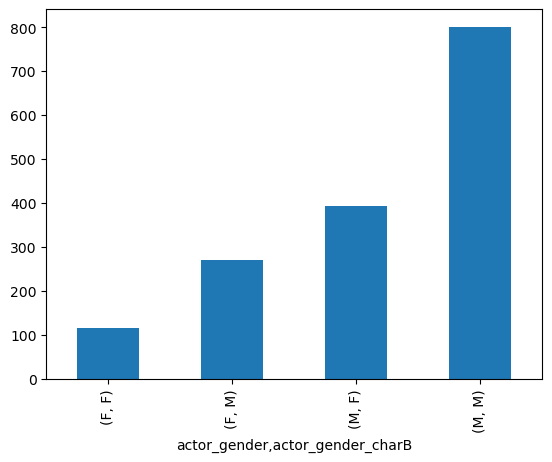

In [118]:
#histogram of crime across genres
graph_df.groupby(['actor_gender', 'actor_gender_charB'])['crime'].sum().plot(kind='bar')

In [106]:
graph_df

,Wikipedia movie ID,char A,action,char B,combined_action,freebase_movie_id,movie_name,movie_release_date,movie_box_office_revenue,movie_runtime,...,actor_dob_charB,actor_gender_charB,actor_height_charB,actor_ethnicity_charB,actor_name_charB,actor_age_charB,freebase_character_map_1_charB,freebase_character_map_2_charB,freebase_character_map_3_charB,crime
0,31186339,Peeta Mellark,"[reveal, love, for]",Katniss Everdeen,reveal love for,/m/0gkz15s,The Hunger Games,2012-03-12,686533290.0,142.0,...,1990-08-15,F,1.75,NaN,Jennifer Lawrence,21.0,/m/0gw7kv0,/m/0c01vfc,/m/02x0dzw,0
1,31186339,Katniss Everdeen,[discover],Peeta Mellark,discover,/m/0gkz15s,The Hunger Games,2012-03-12,686533290.0,142.0,...,1992-10-12,M,1.70,NaN,Josh Hutcherson,19.0,/m/0gw7kvp,/m/0c03gdc,/m/08wjf4,0
2,31186339,Rue,[call],Katniss Everdeen,call,/m/0gkz15s,The Hunger Games,2012-03-12,686533290.0,142.0,...,1990-08-15,F,1.75,NaN,Jennifer Lawrence,21.0,/m/0gw7kv0,/m/0c01vfc,/m/02x0dzw,0
3,31186339,Katniss Everdeen,[find],Rue,find,/m/0gkz15s,The Hunger Games,2012-03-12,686533290.0,142.0,...,1998-10-23,F,1.42,NaN,Amandla Stenberg,13.0,/m/0gwc398,/m/0gwc39c,/m/0gklrqy,0
4,31186339,Katniss Everdeen,"[comfort, the, dying]",Rue,comfort the dying,/m/0gkz15s,The Hunger Games,2012-03-12,686533290.0,142.0,...,1998-10-23,F,1.42,NaN,Amandla Stenberg,13.0,/m/0gwc398,/m/0gwc39c,/m/0gklrqy,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130178,29046736,Hercules,[confront],Lucy,confront,/m/0dgskgp,I Don't Want to Be Born,1975,NaN,93.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
130179,29046736,Mandy,"[visit, 's]",Lucy,visit 's,/m/0dgskgp,I Don't Want to Be Born,1975,NaN,93.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
130180,29046736,Lucy,"[pay, a, visit]",Tommy,pay a visit,/m/0dgskgp,I Don't Want to Be Born,1975,NaN,93.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
130181,1096473,Leo,[cast],Sergius,cast,/m/045pct,The Last Command,1928,NaN,88.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [89]:
movies = pd.read_csv(os.path.join(parent_folder, "Data\\movie.metadata.tsv"), sep='\t', header=None)
movies.columns = [
    'Wikipedia movie ID',
    'freebase_movie_id',
    'movie_name',
    'movie_release_date',
    'movie_box_office_revenue',
    'movie_runtime',
    'movie_languages',
    'movie_countries',
    'movie_genres'
]
movies['year'] = movies['movie_release_date'].str.extract('(\d{4})', expand=False)
movies['year'] = pd.to_numeric(movies['year'], downcast='integer')
movies['movie_box_office_revenue'] = pd.to_numeric(movies['movie_box_office_revenue'], errors='coerce')
movies['movie_runtime'] = pd.to_numeric(movies['movie_runtime'], errors='coerce')
# movie language distribution
query = re.compile(r'"(\w+) Language"')
movies['movie_languages'] = movies['movie_languages'].apply(lambda x: query.findall(x))
query = re.compile(r': "(.+)"')
movies['movie_countries'] = movies['movie_countries'].apply(lambda x: query.findall(x)[0] if query.findall(x) != [] else '')
query = re.compile(r': "(.+?)"')
movies['movie_genres'] = movies['movie_genres'].apply(lambda x: query.findall(x))
characters_df= pd.read_csv(os.path.join(parent_folder, "Data\\character.metadata.tsv"), sep='\t', header=None)
characters_df.columns = [
    'Wikipedia movie ID',
    'freebase_movie_id',
    'movie_release_date',
    'character_name',
    'actor_dob',
    'actor_gender',
    'actor_height',
    'actor_ethnicity',
    'actor_name',
    'actor_age',
    'freebase_character_map_1',
    'freebase_character_map_2',
    'freebase_character_map_3'
]
characters_df.head()

,Wikipedia movie ID,freebase_movie_id,movie_release_date,character_name,actor_dob,actor_gender,actor_height,actor_ethnicity,actor_name,actor_age,freebase_character_map_1,freebase_character_map_2,freebase_character_map_3
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg


In [90]:
def replace_chars(row):
    characters= characters_df[characters_df['Wikipedia movie ID']==row['Wikipedia movie ID']]['character_name'].dropna().tolist()
    if not characters:
        return [row['char A'], row['char B']]
    i=0
    char_A_name=""
    char_B_name=""
    for chars in characters:
        if row['char A'] in chars:
            char_A_name = chars
            i+=1
        if row['char B'] in chars:
            char_B_name = chars
            i+=1
        if i==2:
            print("Done with row: ", row.name)
            return [char_A_name, char_B_name]
    if char_A_name=="":
        char_A_name = row['char A']
    if char_B_name=="":
        char_B_name = row['char B']
    print("Done with row: ", row.name)
    return [char_A_name, char_B_name]

temp_df=graph_df.apply(lambda row: replace_chars(row), axis=1)
real_char=pd.DataFrame(temp_df)
real_char[['charA', 'charB']] = real_char[0].apply(pd.Series)
real_char.drop(0, axis=1, inplace=True)
graph_df[['char A', 'char B']] = real_char[['charA', 'charB']]
graph_df = graph_df.merge(movies, how='left', on='Wikipedia movie ID', suffixes=('_graph', '_movies'))
graph_df = graph_df.merge(characters_df, how='left', left_on=['Wikipedia movie ID', 'char A'], right_on=['Wikipedia movie ID', 'character_name'],suffixes=('', '_charA'))
graph_df = graph_df.merge(characters_df, how='left', left_on=['Wikipedia movie ID', 'char B'], right_on=['Wikipedia movie ID', 'character_name'],suffixes=('', '_charB'))
graph_df

Done with row:  0
Done with row:  1
Done with row:  2
Done with row:  3
Done with row:  4
Done with row:  5
Done with row:  6
Done with row:  7
Done with row:  8
Done with row:  9
Done with row:  10
Done with row:  11
Done with row:  12
Done with row:  13
Done with row:  14
Done with row:  15
Done with row:  16
Done with row:  17
Done with row:  18
Done with row:  26
Done with row:  27
Done with row:  28
Done with row:  29
Done with row:  30
Done with row:  31
Done with row:  32
Done with row:  33
Done with row:  34
Done with row:  35
Done with row:  36
Done with row:  37
Done with row:  38
Done with row:  39
Done with row:  40
Done with row:  41
Done with row:  42
Done with row:  43
Done with row:  44
Done with row:  45
Done with row:  46
Done with row:  47
Done with row:  48
Done with row:  49
Done with row:  50
Done with row:  51
Done with row:  52
Done with row:  54
Done with row:  55
Done with row:  56
Done with row:  57
Done with row:  58
Done with row:  59
Done with row:  60
Don

0         [Peeta Mellark, Katniss Everdeen]
1         [Katniss Everdeen, Peeta Mellark]
2                   [Rue, Katniss Everdeen]
3                   [Katniss Everdeen, Rue]
4                   [Katniss Everdeen, Rue]
                        ...                
126304                     [Hercules, Lucy]
126305                        [Mandy, Lucy]
126306                        [Lucy, Tommy]
126307                       [Leo, Sergius]
126308                       [Leo, Sergius]
Length: 126309, dtype: object

In [99]:
graph_df.to_csv(os.path.join(parent_folder, "Data\\final_merged_df.csv"), index=False)

In [7]:
import numpy as np
from heapq import nlargest

# Assuming 'kmeans_labels' is the cluster assignments from K-Means
# Assuming 'word_vectors' is a dictionary where keys are words and values are their corresponding vectors

# Create a dictionary to store the cluster assignments for each word
word_clusters = {word: cluster for word, cluster in zip(word_vectors.keys(), kmeans_labels)}

# Create a dictionary to store the vectors of words in each cluster
cluster_vectors = {cluster: [] for cluster in set(kmeans_labels)}

# Populate the dictionary
for word, cluster in word_clusters.items():
    cluster_vectors[cluster].append(word_vectors[word])

# Compute the centroid for each cluster
cluster_centroids = {cluster: np.mean(vectors, axis=0) for cluster, vectors in cluster_vectors.items()}

# Find the top three words associated with each centroid
centroid_words_top3 = {}
for cluster, centroid in cluster_centroids.items():
    # Find the top three closest words to the centroid
    closest_words = nlargest(3, word_vectors.keys(), key=lambda word: -np.linalg.norm(word_vectors[word] - centroid))
    centroid_words_top3[cluster] = closest_words

# Print the top three words associated with each centroid
for cluster, words in centroid_words_top3.items():
    print(f"Cluster {cluster} Centroid: {words}")



Cluster 0 Centroid: ['forget', 'appreciate', 'pretend']
Cluster 1 Centroid: ['roadhouse', 'boathouse', 'floozie']
Cluster 2 Centroid: ['uncharacteristically', 'ambivalence', 'superlative']
Cluster 3 Centroid: ['reemergence', 'inevitability', 'predicament']
Cluster 4 Centroid: ['octogenarian', 'wunderkind', 'upperclassman']
Cluster 5 Centroid: ['groundskeeper', 'borstal', 'cyborgs{{emdash}}the']
Cluster 6 Centroid: ['harmonica', 'clarinetist', 'bandleader']
Cluster 7 Centroid: ['watery', 'waterfall', 'moonlight']
Cluster 8 Centroid: ['moneylender', 'underwrite', 'mortgage']
Cluster 9 Centroid: ['definitely', 'obviously', 'honestly']
Cluster 10 Centroid: ['astonishing', 'lovelorn', 'extraordinarily']
Cluster 11 Centroid: ['guileless', 'ostensibly', 'presumably']
Cluster 12 Centroid: ['stepdaughter', 'stepfather', 'granddaughter']
Cluster 13 Centroid: ['10,000', '15,000', '185,000']
Cluster 14 Centroid: ['6', '4', '7']
Cluster 15 Centroid: ['ironically', 'presumably', 'basically']
Cluster

In [ ]:
i=50
id=graph_df['Wikipedia movie ID'].unique()[i]
data = graph_df[graph_df['Wikipedia movie ID']==id]
plt.figure(figsize=(15, 15))
G=nx.MultiDiGraph()

def edge_center_coordinates(edge, curvature, pos):
    start_x, start_y = pos[edge[0]]
    end_x, end_y = pos[edge[1]]
    
    # Calculate the control point coordinates for the curved edge
    control_x = 0.5 * (start_x + end_x) + curvature * (end_y - start_y)
    control_y = 0.5 * (start_y + end_y) - curvature * (end_x - start_x)
    
    # Calculate the Bezier curve parameters
    t = 0.5  # Midpoint of the curve
    bx = (1 - t)**2 * start_x + 2 * (1 - t) * t * control_x + t**2 * end_x
    by = (1 - t)**2 * start_y + 2 * (1 - t) * t * control_y + t**2 * end_y
    
    return bx, by

for subj in data["char A"].unique():
    G.add_node(subj, color="lightblue", node_size=2000)
    i=1
    for verb, obj in data[data["char A"]==subj][["combined_action", "char B"]].itertuples(index=False):
        G.add_edge(subj, obj, label=verb, curvature=i/10)
        i+=2

pos = nx.circular_layout(G)

# Draw nodes separately
nx.draw_networkx_nodes(G, pos, node_size=2000, node_color='lightblue')
# Draw node labels if needed
nx.draw_networkx_labels(G, pos, font_size=10, font_color='black')

# Draw the graph with curved edges based on the 'curvature' attribute
for edge in G.edges(data=True):
    edge_data = edge[2]
    label = edge_data['label']
    curvature = edge_data.get('curvature', 0.1)  # Default curvature if 'curvature' is not present
    #draw edges
    nx.draw_networkx_edges(G, pos, edgelist=[(edge[0], edge[1])], connectionstyle=f'arc3,rad={curvature}', edge_color='black', width=2, alpha=0.7, label=label, arrows=True, arrowsize=50, arrowstyle='-|>')
    center_coordinates = edge_center_coordinates(edge, curvature, pos)
    plt.text(center_coordinates[0], center_coordinates[1], label, color='red', fontsize=8, ha='center', va='center', bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

# Show the plot
plt.show()

# Pipeline
this code snippet was used to create Verb_Subject_Object.csv and character_list.csv

In [ ]:
final_df=pd.DataFrame(columns=["Wikipedia movie ID", "Sentence", "Verb", "Subject", "Object"])
char_df=pd.DataFrame(columns=["Wikipedia movie ID", "characters"])
nlp = spacy.load("en_core_web_lg")

for i, id in enumerate(plots_df.index):
    sent_df=pd.DataFrame(columns=["Wikipedia movie ID", "Sentence", "Verb", "Subject", "Object", "nsubj", "nsubjpass", "dobj", "agent", "ccomp"])
    plot=plots_df.iloc[i]["Plot Summary"]
    doc= nlp(plot)
    characters = get_characters(doc)
    print(characters)
    char_values = {"Wikipedia movie ID": id,"characters": characters}
    char_df.loc[len(char_df)] = char_values
    sent_num = 0
    for sent in doc.sents:
        # print the verb and all its children and their dependency relations
        sent_num += 1
        for token in sent:
            if token.pos_ == "VERB":
                # Create a dictionary with the values to be assigned
                values = {"Wikipedia movie ID": id,"Sentence": sent_num, "Verb": token.lemma_}
                for child in token.children:
                    if child.dep_ in sent_df.columns:
                        values[child.dep_] = get_all_children(child)
                # Append the dictionary as a new row to sent_df
                sent_df.loc[len(sent_df)] = values
    sent_df["Object"] = sent_df["dobj"].combine_first(sent_df["nsubjpass"]).combine_first(sent_df["ccomp"])
    sent_df.drop(columns=["dobj", "nsubjpass", "ccomp"], inplace=True)
    sent_df["Subject"] = sent_df["nsubj"].combine_first(sent_df["agent"])
    sent_df.drop(columns=["nsubj", "agent"], inplace=True)
    sent_df["Object"] = sent_df["Object"].apply(replace_tokens_with_refs)
    sent_df["Subject"] = sent_df["Subject"].apply(replace_tokens_with_refs)
    final_df=pd.concat([final_df, sent_df], ignore_index=True)
    if (i+1) % 5000 == 0:
        final_df.to_csv(f'Verb_Subject_Object_{i}.csv', index=False)
        char_df.to_csv(f'characters_{i}.csv', index=False)
        char_df=pd.DataFrame(columns=["Wikipedia movie ID", "characters"])
        final_df = pd.DataFrame(columns=["Wikipedia movie ID", "Sentence", "Verb", "Subject", "Object"])
    print("Done with movie : ", i)

char_df.to_csv('characters_end.csv', index=False)
final_df.to_csv('Verb_Subject_Object_end.csv', index=False)
df=final_df.merge(char_df, how='left', on='Wikipedia movie ID')

this code snippet was used to create transform the charA_action_charB.csv and charA_action_charB_filtered.csv and graph_df.csv

In [ ]:
filtered_df = df[df.apply(lambda row: (isinstance(row["Subject"], list) and any(elem in row["characters"] for elem in row["Subject"])) or (isinstance(row["Object"], list) and any(elem in row["characters"] for elem in row["Object"])), axis=1)]
filtered_df.reset_index(drop=True, inplace=True)

def transform_row(row):
    verb = [row["Verb"]] if pd.notna(row["Verb"]) else []
    subject = row["Subject"] if isinstance(row["Subject"], list) else []
    obj = row["Object"] if isinstance(row["Object"], list) else []
    characters= row["characters"] if isinstance(row["characters"], list) else []
    char_A = set([char for char in subject if  char in characters])
    char_B = set([char for char in obj if char in characters])
    action = []
    for word in (verb + obj):
        if word in char_A:
            continue
        elif word in characters:
            break
        action.append(word)
    print("done with index", row.name)
    return pd.Series({"Wikipedia movie ID": row["Wikipedia movie ID"],"char A": list(char_A), "action": action, "char B": list(char_B)})

transformed_df = filtered_df.apply(transform_row, axis=1)
graph_df=transformed_df[(transformed_df["char A"].apply(lambda x: len(x) > 0)) & (transformed_df["char B"].apply(lambda x: len(x) > 0)) & (transformed_df["char A"]!=transformed_df["char B"])]
graph_df=graph_df.explode('char B').explode('char A')
graph_df=graph_df[graph_df['char A']!=graph_df['char B']].reset_index(drop=True)

In [ ]:
transformed_df.to_csv('charA_action_charB.csv', index=False)
graph_df.to_csv('graph_df.csv', index=False)